# Data collection

In [1]:
# As the requirement about Gutengerg Dataset, I have found out the link where I could get this data. I downloaded
# it. In the data I got, there are about 143 authors but I only selected 12 of them as my data. For each author,
# I chose about 6 to 10 .txt files and I was trying to make sure that all the text for each of them are above 1000
# texts as the requiement.
# About where I can get the data, you can see the link here 
# - "https://web.eecs.umich.edu/~lahiri/gutenberg_dataset.html" and see for more information.

# 1. Pre-process data using Spacy and other methods.

In [3]:
import numpy as np
import re
import nltk
from sklearn.datasets import load_files
nltk.download('stopwords')
import pickle
from nltk.corpus import stopwords
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

[nltk_data] Downloading package stopwords to /home/dungpm/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
movie_data = load_files(r"/home/dungpm/dungpm/NLP_author_classification/data")
X, y = movie_data.data, movie_data.target

In [5]:
# Take a look at length of traning data and target
print("Length of traning data - text files: ", len(X))
print("Length of targets - authors: ", len(y))

Length of traning data - text files:  106
Length of targets - authors:  106


In [6]:
# For target lables
print("Target's lables: ", y)

Target's lables:  [11  1  8  0  3 11 11  0  2  9  7  3  5  6  8  6  1  8  9  6 11  0  3 10
  4  0  7  5  3  0  8 10  8 10  9  6  3  2  6  5  7  7  5  0  8  5  4  0
  1  2  4  4  0  6 11  6  0  4  3  6  5  1  7  4  3  3 10  6  9 10  4  9
  1  8  2  3  5 11 11  7  2 11  8  8  3  4  8  5 11  4  7  6  1 10  9  7
  9  4  2  9  0 11  7  7  5  5]


In [7]:
# I use "load_file" function from sklearn to load all the data. This function will help me to automativally 
# devide the data into training data and target.

In [8]:
# After I chose some .txt file for each author, I have done some simple filter on these file. I delete all the name
# of each author in their file to make sure that these name will NOT effect as strong feature during traing data.
# And I hope this - pre-processing data step will make a good result.

In [9]:
# Now let do some more other pre-processing step with this data using Spacy and other methods. Text may 
# contain numbers, special characters, and unwanted spaces. I am going to remove them out of the data.

In [10]:
print(X[0])

b'\r\n\r\nA PHYLLIS OF THE SIERRAS\r\n\r\n\r\nBy Bret Harte\r\n\r\n\r\n\r\n\r\nCHAPTER I.\r\n\r\n\r\nWhere the great highway of the Sierras nears the summit, and the pines\r\nbegin to show sterile reaches of rock and waste in their drawn-up files,\r\nthere are signs of occasional departures from the main road, as if the\r\nweary traveller had at times succumbed to the long ascent, and turned\r\naside for rest and breath again. The tired eyes of many a dusty\r\npassenger on the old overland coach have gazed wistfully on those sylvan\r\nopenings, and imagined recesses of primeval shade and virgin wilderness\r\nin their dim perspectives. Had he descended, however, and followed one\r\nof these diverging paths, he would have come upon some rude wagon track,\r\nor "logslide," leading from a clearing on the slope, or the ominous\r\nsaw-mill, half hidden in the forest it was slowly decimating. The\r\nwoodland hush might have been broken by the sound of water passing over\r\nsome unseen dam in 

In [11]:
# find out average number of words in each text file
length_of_data = []
for i in range(len(X)):
    length_of_data.append(len(X[i]))
ave_num = round(sum(length_of_data)/len(length_of_data))
print("Average number of words in each text file: ", ave_num, "words")

Average number of words in each text file:  379659 words


In [12]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
documents = []
stemmer = WordNetLemmatizer()
for sen in range(0, len(X)):
    # Remove all the special characters
    document = re.sub(r'\W', ' ', str(X[sen]))
    # remove "\n"
    document = re.sub(r'\n\s+', ' ', document)
    # remove "\n"
    document = re.sub(r'\r\s+', ' ', document)
    # remove all single characters
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 
    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)
    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)
    # Converting to Lowercase
    document = document.lower()
    # remove all single "n" characters
    document = re.sub(r'n\s+', ' ', document)
    # remove all single "r" characters
    document = re.sub(r'r\s+', ' ', document)
    # Lemmatization
    document = document.split()
    document = [stemmer.lemmatize(word) for word in document]
    document = ' '.join(document)
    documents.append(document)

[nltk_data] Downloading package wordnet to /home/dungpm/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [13]:
print(documents[0])

na phyllis of the sierra nby bret harte nchapte nwhere the great highway of the sierra nears the summit and the pine nbegi to show sterile reach of rock and waste i thei draw up file nthere are sign of occasional departure from the mai road a if the nweary travelle had at time succumbed to the long ascent and turned naside fo rest and breath agai the tired eye of many dusty npassenge o the old overland coach have gazed wistfully o those sylva nopenings and imagined recess of primeval shade and virgi wilderness ni thei dim perspective had he descended howeve and followed one nof these diverging path he would have come upo some rude wago track no logslide leading from clearing o the slope o the ominous nsaw mill half hidde i the forest it wa slowly decimating the nwoodland hush might have bee broke by the sound of wate passing ove nsome unsee dam i the hollow o the hiss of escaping steam and throb nof a invisible engine i the covert nsuch at least wa the experience of young fellow of fiv

In [13]:
# The training data after remove some numbers, special characters, and unwanted spaces
print("Length of traning data: ", len(documents))

Length of traning data:  106


# 2. Perform data exploration

In [157]:
# Let see how many text files data for each author
import matplotlib.pyplot as plt
num_of_labels = [0 for i in range(0,12,1)]
for i in range(len(y)):
    for j in range(len(num_of_labels)):
        if y[i] == j:
            num_of_labels[j] = num_of_labels[j]+1
print(num_of_labels)

[10, 6, 6, 10, 10, 10, 10, 10, 10, 8, 6, 10]


In [158]:
# This is not an imbalence data so I think this data is good enough as exprerimental data for applying several
# supervised methos to test.

Text(0.5, 1.0, 'Total number of texts file for each author')

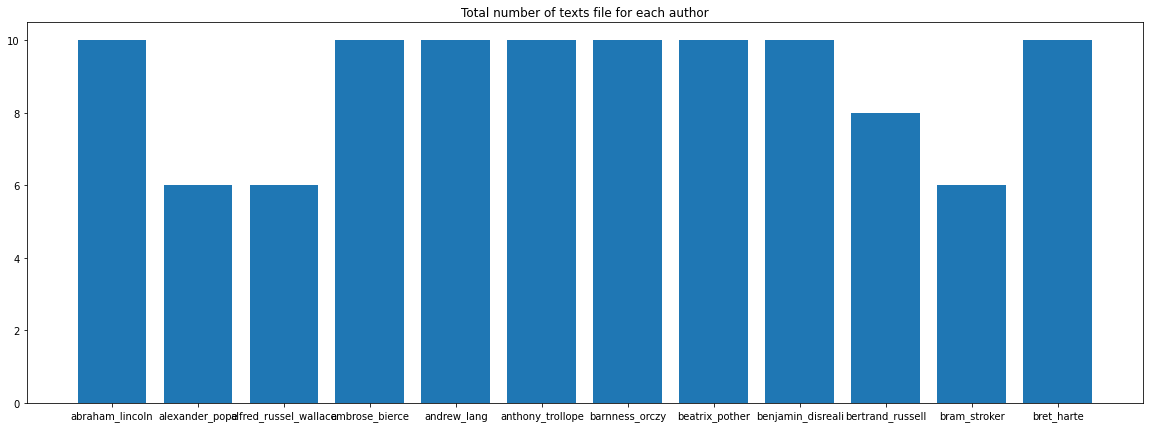

In [159]:
labels = ["abraham_lincoln", "alexander_pope", "alfred_russel_wallace", "ambrose_bierce", "andrew_lang", 
         "anthony_trollope", "barnness_orczy", "beatrix_pother", "benjamin_disreali", "bertrand_russell",
         "bram_stroker", "bret_harte"]

plt.figure(figsize=(20, 7))
plt.bar(labels, num_of_labels)
plt.title('Total number of texts file for each author')

In [160]:
# Let see how many words data for each author
number_of_words = [0 for i in range(0,12,1)]
for i in range(len(y)):
    for j in range(len(number_of_words)):
        if y[i] == j:
            number_of_words[j] = number_of_words[j]+len(documents[i])
print(number_of_words)

[1364954, 2635703, 3877423, 1835919, 2390413, 6050328, 4886331, 319762, 5261171, 2563908, 2930544, 2147467]


Text(0.5, 1.0, 'Total number of words for each author')

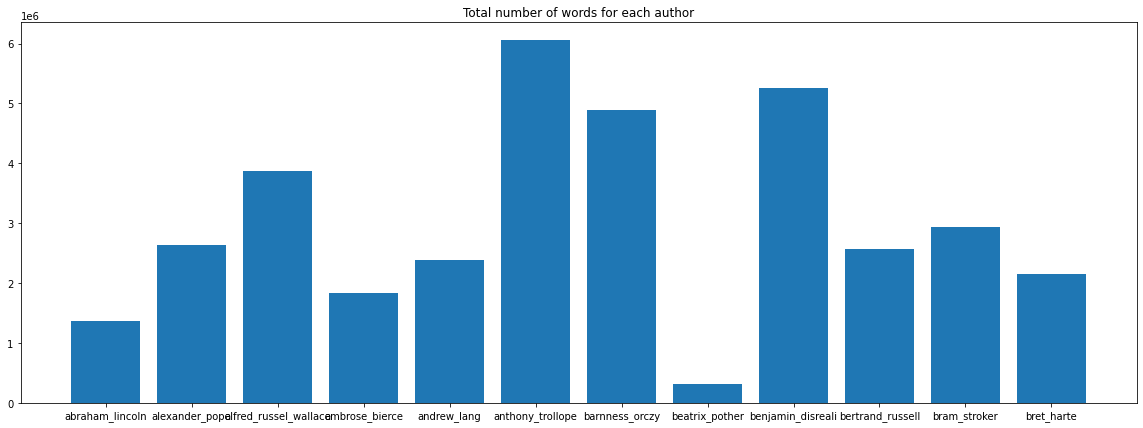

In [161]:
labels = ["abraham_lincoln", "alexander_pope", "alfred_russel_wallace", "ambrose_bierce", "andrew_lang", 
         "anthony_trollope", "barnness_orczy", "beatrix_pother", "benjamin_disreali", "bertrand_russell",
         "bram_stroker", "bret_harte"]

plt.figure(figsize=(20, 7))
plt.bar(labels, number_of_words)
plt.title('Total number of words for each author')

# 3. Using Bag of Word, apply supervised models such as Naive Bayes, Logistic Regression, Decision Tree, Random Forest, KNN, SVM and Gradient Boosting, including GridSearchCV.

In [162]:
# I am using the Bag of Word method to convert text documents into corresponding numerical features.

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
X = vectorizer.fit_transform(documents).toarray()

In [17]:
print(len(X[0]))

1500


In [19]:
count = 0
for i in range(len(X)):
    count = count + len(X[i])
print("Total words in data: ", count)

Total words in data:  159000


In [164]:
# Divides data into 20% test set and 80% training set

In [165]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print("Training data: ", len(X_train), "for features", len(y_train), "for targets")
print("Training data: ", len(X_test), "for features", len(y_test), "for targets")

Training data:  84 for features 84 for targets
Training data:  22 for features 22 for targets


## Naive Bayes

In [169]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
#Create a Gaussian Classifier
gnb = GaussianNB()
#Train the model using the training sets
gnb.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = gnb.predict(X_test)
print("Confusion matrix: ", "\n", confusion_matrix(y_test,y_pred))
print("Classification report: ", "\n", classification_report(y_test,y_pred))
print("Accuracy score: ", accuracy_score(y_test, y_pred))

Confusion matrix:  
 [[0 0 0 0 0 0 0 0 2 0 0]
 [0 1 0 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 3 0 0]
 [0 0 0 0 2 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 3 0 0]
 [0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 0 0 0 0 2 0]
 [0 0 0 0 0 0 0 0 1 0 1]]
Classification report:  
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         3
           4       0.67      1.00      0.80         2
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00         1
           7       1.00      1.00      1.00         1
           8       0.17      1.00      0.29         2
           9       1.00      1.00      1.00         2
          11       1.00      0.50      0.67         2

    accuracy               

## Logistic Regression

In [194]:
# import the class
from sklearn.linear_model import LogisticRegression
# instantiate the model (using the default parameters)
logreg_dafault = LogisticRegression(solver='saga')
# fit the model with data
logreg_dafault.fit(X_train,y_train)
#Predict the Y values from X_test data
y_pred_LR = logreg_dafault.predict(X_test)
print("Confusion matrix: ", "\n", confusion_matrix(y_test,y_pred_LR))
print("Classification report: ", "\n", classification_report(y_test,y_pred_LR))
print("Accuracy score: ", accuracy_score(y_test, y_pred_LR))

Confusion matrix:  
 [[2 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 2]
 [0 0 0 0 2 0 0 0 0 0 0 0]
 [0 0 0 0 0 2 0 0 0 0 1 1]
 [0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 2 0 0 0]
 [0 0 0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 2]]
Classification report:  
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         2
           3       1.00      0.33      0.50         3
           4       1.00      1.00      1.00         2
           5       1.00      0.50      0.67         4
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       0.00      0.00

## Random Forest 

In [168]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=1000, random_state=0)
classifier.fit(X_train, y_train)
y_pred_rf = classifier.predict(X_test)
print("Confusion matrix: ", "\n", confusion_matrix(y_test,y_pred_rf))
print("Classification report: ", "\n", classification_report(y_test,y_pred_rf))
print("Accuracy score: ", accuracy_score(y_test, y_pred_rf))

Confusion matrix:  
 [[2 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0 0]
 [0 0 0 2 0 0 0 0 0 0 1]
 [1 0 0 0 1 0 0 0 0 0 0]
 [1 0 0 0 0 3 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 1 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 2 0]
 [0 0 0 0 0 0 0 0 0 0 2]]
Classification report:  
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         2
           3       1.00      0.67      0.80         3
           4       0.50      0.50      0.50         2
           5       1.00      0.75      0.86         4
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      0.50      0.67         2
           9       1.00      1.00      1.00         2
          11       0.67      1.00      0.80         2

    accuracy               

## Decision Tree

In [180]:
# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred_DT = clf.predict(X_test)
print("Confusion matrix: ", "\n", confusion_matrix(y_test,y_pred_DT))
print("Classification report: ", "\n", classification_report(y_test,y_pred_DT))
print("Accuracy score: ", accuracy_score(y_test, y_pred_DT))

Confusion matrix:  
 [[1 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 1 0 0 0 0 0 0]
 [1 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 2 0 0 0 0 0]
 [1 0 0 0 1 0 0 0 0 0 0]
 [0 1 0 1 0 2 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0]
 [0 1 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 2]
 [0 0 0 0 0 0 0 0 0 0 2]]
Classification report:  
               precision    recall  f1-score   support

           0       0.33      0.50      0.40         2
           1       0.00      0.00      0.00         1
           2       1.00      0.50      0.67         2
           3       0.00      0.00      0.00         3
           4       0.33      0.50      0.40         2
           5       0.50      0.50      0.50         4
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      0.50      0.67         2
           9       0.00      0.00      0.00         2
          11       0.50      1.00      0.67         2

    accuracy               

## Decision Tree with Entropy

In [182]:
# Create Decision Tree classifer object with Entropy
clfe = DecisionTreeClassifier(criterion='entropy')
clfe = clfe.fit(X_train,y_train)
y_pred_DTe = clfe.predict(X_test)
print("Confusion matrix: ", "\n", confusion_matrix(y_test,y_pred_DTe))
print("Classification report: ", "\n", classification_report(y_test,y_pred_DTe))
print("Accuracy score: ", accuracy_score(y_test, y_pred_DTe))

Confusion matrix:  
 [[2 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 1 0 0]
 [0 0 0 1 0 1 0 0 1 0 0 0]
 [1 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 2 1 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 2 0 0 0]
 [0 0 0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 2 0]]
Classification report:  
               precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       0.00      0.00      0.00         1
           2       1.00      0.50      0.67         2
           3       0.50      0.33      0.40         3
           4       0.50      0.50      0.50         2
           5       0.67      0.50      0.57         4
           6       0.50      1.00      0.67         1
           7       1.00      1.00      1.00         1
           8       0.67      1.00      0.80         2
           9       0.67      1.00      0.80         2
          10       0.00      0.00

## Gradient Boosting

In [183]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error
clf_GB = GradientBoostingClassifier(random_state=0)
clf_GB.fit(X_train, y_train)
y_pred_GB = clf_GB.predict(X_test)
print("Confusion matrix: ", "\n", confusion_matrix(y_test,y_pred_GB))
print("Classification report: ", "\n", classification_report(y_test,y_pred_GB))
print("Accuracy score: ", accuracy_score(y_test, y_pred_GB))

Confusion matrix:  
 [[2 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 0 0 0 0 0 1]
 [1 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 1 0 2 0 1 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 1 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 2]]
Classification report:  
               precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         2
           3       0.50      0.33      0.40         3
           4       0.50      0.50      0.50         2
           5       0.67      0.50      0.57         4
           6       1.00      1.00      1.00         1
           7       0.50      1.00      0.67         1
           8       1.00      1.00      1.00         2
           9       1.00      0.50      0.67         2
          11       0.67      1.00      0.80         2

    accuracy               

## SVM(Support Vector Machines)

In [186]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import numpy as np
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
clf_SVM = make_pipeline(StandardScaler(), SVC(gamma='auto',max_iter=200,probability=True))
clf_SVM.fit(X_train, y_train)
y_test_SVM = clf_SVM.predict(X_test)
print("Confusion matrix: ", "\n", confusion_matrix(y_test,y_test_SVM))
print("Classification report: ", "\n", classification_report(y_test,y_test_SVM))
print("Accuracy score: ", accuracy_score(y_test, y_test_SVM))

Confusion matrix:  
 [[1 0 0 0 0 0 0 1 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 2 0 0]
 [0 0 0 1 0 0 0 1 0 0 1]
 [0 0 0 0 0 0 0 1 1 0 0]
 [0 0 0 0 0 0 0 1 3 0 0]
 [0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 0 0 0 0 0 2]]
Classification report:  
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       1.00      1.00      1.00         1
           2       0.00      0.00      0.00         2
           3       1.00      0.33      0.50         3
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00         1
           7       0.20      1.00      0.33         1
           8       0.18      1.00      0.31         2
           9       0.00      0.00      0.00         2
          11       0.67      1.00      0.80         2

    accuracy               

## KNN

In [187]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X_train, y_train)
y_test_knn = neigh.predict(X_test)
print("Confusion matrix: ", "\n", confusion_matrix(y_test,y_test_knn))
print("Classification report: ", "\n", classification_report(y_test,y_test_knn))
print("Accuracy score: ", accuracy_score(y_test, y_test_knn))

Confusion matrix:  
 [[2 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0 0]
 [0 0 0 2 0 0 0 0 0 0 1]
 [0 0 0 1 0 0 0 1 0 0 0]
 [1 0 0 0 0 1 0 0 0 0 2]
 [0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 2 0]
 [0 0 0 0 0 0 0 0 0 0 2]]
Classification report:  
               precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         2
           3       0.50      0.67      0.57         3
           4       0.00      0.00      0.00         2
           5       1.00      0.25      0.40         4
           6       0.00      0.00      0.00         1
           7       0.50      1.00      0.67         1
           8       1.00      0.50      0.67         2
           9       1.00      1.00      1.00         2
          11       0.40      1.00      0.57         2

    accuracy               

## Summary - 1

In [201]:
# 1. Accuracy score with Naive Bayes:  0.5
# 2. Accuracy score with Logistic Regression:  0.8181818181818182
# 3. Accuracy score with Random Forest:  0.8181818181818182
# 4. Accuracy score with Decision Tree:  0.45454545454545453 without Entropy AND 0.5909090909090909 with Entropy
# 5. Accuracy score with Gradient Boosting: 0.7272727272727273
# 6. Accuracy score with SVM(Support Vector Machines): 0.36363636363636365
# 7. Accuracy score with KNN: 0.6363636363636364

# Applying GridSearchCV

## Logistic Regression

In [190]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

params = {'penalty':['l1', 'l2'],'dual':[True, False],'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000], 
          'fit_intercept':[True, False],'solver':['saga'],'max_iter':[100,150]}

gridlog = GridSearchCV(LogisticRegression(), params,scoring= 'f1_micro', cv=5, n_jobs=2)
gridlog.fit(X_train, y_train)
print("The best parameter for Logistic Regression model: ",gridlog.best_params_)

The best parameter for Logistic Regression model:  {'C': 0.001, 'dual': False, 'fit_intercept': True, 'max_iter': 150, 'penalty': 'l2', 'solver': 'saga'}


In [191]:
#using the parameters from gridseaarchCV for Logistic Regression
logreg = LogisticRegression(C= 0.001, dual= False, fit_intercept = True, max_iter=150, penalty= 'l2', solver='saga')
# fit the model with data
logreg.fit(X_train,y_train)
#Predict the Y values from X_test data
y_pred_LR_GridSearchCV = logreg.predict(X_test)
print("Confusion matrix: ", "\n", confusion_matrix(y_test,y_pred_LR_GridSearchCV))
print("Classification report: ", "\n", classification_report(y_test,y_pred_LR_GridSearchCV))
print("Accuracy score: ", accuracy_score(y_test, y_pred_LR_GridSearchCV))

Confusion matrix:  
 [[2 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0 0 0]
 [0 0 0 3 0 0 0 0 0 0 0 0]
 [0 0 0 0 2 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 1 2]
 [0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 2]]
Classification report:  
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         3
           4       0.67      1.00      0.80         2
           5       1.00      0.25      0.40         4
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      0.50      0.67         2
           9       1.00      1.00      1.00         2
          10       0.00      0.00

## Random Forest

In [199]:
from sklearn.ensemble import RandomForestClassifier
params = {'n_estimators':[200,250],'criterion':['gini','entropy'], 'max_depth':[8,10,12],
         'min_samples_split':[1,2],'max_leaf_nodes':[10,12],'max_features':['auto', 'sqrt', 'log2']}
rf = RandomForestClassifier()
grid_rf = GridSearchCV(rf, params)
grid_rf.fit(X_train, y_train)
print("The best parameter for Decision Tree model: ",grid_rf.best_params_)

The best parameter for Decision Tree model:  {'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'max_leaf_nodes': 12, 'min_samples_split': 2, 'n_estimators': 250}


In [200]:
#Create a Gaussian Classifier
clf_RF = RandomForestClassifier(criterion='gini', max_depth= 10, max_features='auto', 
                                max_leaf_nodes= 12, min_samples_split= 2, n_estimators= 250)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf_RF.fit(X_train,y_train)

# Using model to predict
y_pred_RF_GridSearchCV = clf_RF.predict(X_test)
print("Confusion matrix: ", "\n", confusion_matrix(y_test,y_pred_RF_GridSearchCV))
print("Classification report: ", "\n", classification_report(y_test,y_pred_RF_GridSearchCV))
print("Accuracy score: ", accuracy_score(y_test, y_pred_RF_GridSearchCV))

Confusion matrix:  
 [[1 0 0 0 0 0 0 1 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0 0]
 [0 0 0 2 0 0 0 0 0 0 1]
 [1 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 3 0 1 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 1 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 2 0]
 [0 0 0 0 0 0 0 0 0 0 2]]
Classification report:  
               precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         2
           3       1.00      0.67      0.80         3
           4       0.50      0.50      0.50         2
           5       1.00      0.75      0.86         4
           6       1.00      1.00      1.00         1
           7       0.33      1.00      0.50         1
           8       1.00      0.50      0.67         2
           9       1.00      1.00      1.00         2
          11       0.67      1.00      0.80         2

    accuracy               

## Gradient Boosting

In [206]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
# Call the model
clf_GB = GradientBoostingClassifier()
params = {'learning_rate':[0.06,0.08],'n_estimators':[200,250], 'max_depth':[8,9,10,12],
         'min_samples_split':[2,4],'max_leaf_nodes':[1,2],'max_features':['auto', 'sqrt', 'log2']}

grid_gb = GridSearchCV(clf_GB, params)
grid_gb.fit(X_train, y_train)
print("The best parameter for Decision Tree model: ",grid_gb.best_params_)

The best parameter for Decision Tree model:  {'learning_rate': 0.06, 'max_depth': 12, 'max_features': 'log2', 'max_leaf_nodes': 2, 'min_samples_split': 4, 'n_estimators': 200}


In [207]:
# Call the model
clf_GB = GradientBoostingClassifier(learning_rate= 0.06, max_depth= 12, max_features= 'log2',
                                    max_leaf_nodes= 2, min_samples_split= 4, n_estimators= 200,random_state=0)
#Fit the model
clf_GB.fit(X_train, y_train)
#Use the model to predict
y_pred_GB_GridSearchCV = clf_GB.predict(X_test)
print("Confusion matrix: ", "\n", confusion_matrix(y_test,y_pred_GB_GridSearchCV))
print("Classification report: ", "\n", classification_report(y_test,y_pred_GB_GridSearchCV))
print("Accuracy score: ", accuracy_score(y_test, y_pred_GB_GridSearchCV))

Confusion matrix:  
 [[2 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0 0]
 [0 0 0 3 0 0 0 0 0 0 0]
 [1 0 0 0 1 0 0 0 0 0 0]
 [1 0 0 0 0 3 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 2 0]
 [0 0 0 0 0 0 0 0 0 0 2]]
Classification report:  
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         2
           3       0.75      1.00      0.86         3
           4       1.00      0.50      0.67         2
           5       1.00      0.75      0.86         4
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      0.50      0.67         2
           9       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         2

    accuracy               

## Decision Tree

In [197]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {'criterion':['gini','entropy'], 'splitter':['best', 'random'],'max_depth':[4,5,6,7,8,9,10],
          'min_samples_split':[1,2,3,4,5],'max_leaf_nodes':[10,12,14,16,18,20]}
dt = DecisionTreeClassifier()
grid_dt = GridSearchCV(dt, params)
grid_dt.fit(X_train, y_train)
print("The best parameter for Decision Tree model: ",grid_dt.best_params_)

The best parameter for Decision Tree model:  {'criterion': 'gini', 'max_depth': 9, 'max_leaf_nodes': 12, 'min_samples_split': 3, 'splitter': 'best'}


In [198]:
#using the parameters from gridseaarchCV for Decision Tree model
clf = DecisionTreeClassifier(criterion= 'entropy', max_depth= 9, max_leaf_nodes= 12, min_samples_split= 3, 
                             splitter= 'best')
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred_DT_GridSearchCV = clf.predict(X_test)
print("Confusion matrix: ", "\n", confusion_matrix(y_test,y_pred_DT_GridSearchCV))
print("Classification report: ", "\n", classification_report(y_test,y_pred_DT_GridSearchCV))
print("Accuracy score: ", accuracy_score(y_test, y_pred_DT_GridSearchCV))

Confusion matrix:  
 [[2 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 2 0 0]
 [1 0 0 1 0 0 0 0 1 0 0 0]
 [1 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 4 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0]
 [0 1 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 1]]
Classification report:  
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       0.50      1.00      0.67         1
           2       0.00      0.00      0.00         2
           3       1.00      0.33      0.50         3
           4       1.00      0.50      0.67         2
           5       0.80      1.00      0.89         4
           6       0.00      0.00      0.00         1
           7       1.00      1.00      1.00         1
           8       0.50      0.50      0.50         2
           9       0.50      1.00      0.67         2
          10       0.00      0.00

## SVM

In [202]:
from sklearn import svm
svc = svm.SVC(gamma='auto')
parameters = {'kernel':('linear','rbf'), 
              'C':[1, 20],'max_iter':[100,200]}
clf = GridSearchCV(svc, parameters)
clf.fit(X_train, y_train)
print("The best parameter for SVM model: ",clf.best_params_)

The best parameter for SVM model:  {'C': 1, 'kernel': 'linear', 'max_iter': 100}


In [203]:
clf_SVM = make_pipeline(StandardScaler(), SVC(gamma='auto',C= 1, kernel= 'linear', max_iter= 100,
                                              probability=True))
clf_SVM.fit(X_train, y_train)
y_test_SVM_GridSearchCV = clf_SVM.predict(X_test)
print("Confusion matrix: ", "\n", confusion_matrix(y_test,y_test_SVM_GridSearchCV))
print("Classification report: ", "\n", classification_report(y_test,y_test_SVM_GridSearchCV))
print("Accuracy score: ", accuracy_score(y_test, y_test_SVM_GridSearchCV))

Confusion matrix:  
 [[2 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0 0 0]
 [0 0 0 2 0 0 0 0 0 0 0 1]
 [1 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 2 0 0 1 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 2 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 2]]
Classification report:  
               precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       0.50      1.00      0.67         1
           2       1.00      1.00      1.00         2
           3       1.00      0.67      0.80         3
           4       0.20      0.50      0.29         2
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00         1
           7       0.50      1.00      0.67         1
           8       0.00      0.00      0.00         2
           9       1.00      1.00      1.00         2
          10       0.00      0.00

## KNN

In [214]:
from sklearn.neighbors import KNeighborsClassifier
k_range = list(range(1,11))
weight_options = ["uniform", "distance"]
param_grid = dict(n_neighbors = k_range, weights = weight_options)
#print (param_grid)
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv = 6, scoring = 'accuracy')
grid.fit(X_train, y_train)
print("The best parameter for SVM model: ",grid.best_params_)

The best parameter for SVM model:  {'n_neighbors': 1, 'weights': 'uniform'}


In [213]:
neigh = KNeighborsClassifier(n_neighbors=1,weights='uniform')
neigh.fit(X_train, y_train)
y_test_knn = neigh.predict(X_test)
print("Confusion matrix: ", "\n", confusion_matrix(y_test,y_test_knn))
print("Classification report: ", "\n", classification_report(y_test,y_test_knn))
print("Accuracy score: ", accuracy_score(y_test, y_test_knn))

Confusion matrix:  
 [[2 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0 0]
 [0 0 0 2 0 0 0 0 0 0 1]
 [0 0 0 1 0 0 0 1 0 0 0]
 [1 0 0 0 0 1 0 0 0 0 2]
 [0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 2 0]
 [0 0 0 0 0 0 0 0 0 0 2]]
Classification report:  
               precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         2
           3       0.50      0.67      0.57         3
           4       0.00      0.00      0.00         2
           5       1.00      0.25      0.40         4
           6       0.00      0.00      0.00         1
           7       0.50      1.00      0.67         1
           8       1.00      0.50      0.67         2
           9       1.00      1.00      1.00         2
          11       0.40      1.00      0.57         2

    accuracy               

## Summary - 2

In [ ]:
######### BEFORE USING GRIDSEARCHCV
# 1. Accuracy score with Naive Bayes:  0.5
# 2. Accuracy score with Logistic Regression:  0.8181818181818182
# 3. Accuracy score with Random Forest:  0.8181818181818182
# 4. Accuracy score with Decision Tree:  0.45454545454545453 without Entropy AND 0.5909090909090909 with Entropy
# 5. Accuracy score with Gradient Boosting: 0.7272727272727273
# 6. Accuracy score with SVM(Support Vector Machines): 0.36363636363636365
# 7. Accuracy score with KNN: 0.6363636363636364


######### AFTER USING GRIDSEARCHCV
# 1. 
# 2. Accuracy score with Logistic Regression:  0.8181818181818182 ==== 0.8181818181818182
# 3. Accuracy score with Random Forest:  0.8181818181818182 >>>> 0.7727272727272727
# 4. Accuracy score with Decision Tree:  0.45454545454545453 without Entropy AND 0.5909090909090909 with Entropy 
# <<<< 0.6363636363636364
# 5. Accuracy score with Gradient Boosting: 0.7272727272727273 <<<< 0.8636363636363636
# 6. Accuracy score with SVM(Support Vector Machines): 0.36363636363636365 <<<< 0.5909090909090909
# 7. Accuracy score with KNN: 0.6363636363636364 ==== 0.6363636363636364

# 4. Similar to 3., but using TF-IDF.

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfconverter = TfidfVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
X_TFIDF = tfidfconverter.fit_transform(documents).toarray()

In [13]:
from sklearn.model_selection import train_test_split
X_train_TFIDF, X_test_TFIDF, y_train_TFIDF, y_test_TFIDF = train_test_split(X_TFIDF, y, test_size=0.2, 
                                                                            random_state=0)
print("Training data: ", len(X_train_TFIDF), "for features", len(y_train_TFIDF), "for targets")
print("Training data: ", len(X_test_TFIDF), "for features", len(y_test_TFIDF), "for targets")

Training data:  84 for features 84 for targets
Training data:  22 for features 22 for targets


## Naive Bayes

In [14]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
#Create a Gaussian Classifier
gnb_TFIDF = GaussianNB()
#Train the model using the training sets
gnb_TFIDF.fit(X_train_TFIDF, y_train_TFIDF)
#Predict the response for test dataset
y_pred_NB_TFIDF = gnb_TFIDF.predict(X_test_TFIDF)
print("Confusion matrix: ", "\n", confusion_matrix(y_test_TFIDF,y_pred_NB_TFIDF))
print("Classification report: ", "\n", classification_report(y_test_TFIDF,y_pred_NB_TFIDF))
print("Accuracy score: ", accuracy_score(y_test_TFIDF, y_pred_NB_TFIDF))

Confusion matrix:  
 [[0 0 0 0 0 0 0 0 2 0 0]
 [0 1 0 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 2 0 0]
 [0 0 0 0 2 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 3 0 0]
 [0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 0 0 0 0 2 0]
 [0 0 0 0 0 0 0 0 1 0 1]]
Classification report:  
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         3
           4       0.50      1.00      0.67         2
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00         1
           7       1.00      1.00      1.00         1
           8       0.18      1.00      0.31         2
           9       1.00      1.00      1.00         2
          11       1.00      0.50      0.67         2

    accuracy               

## Logistic Regression

In [15]:
# import the class
from sklearn.linear_model import LogisticRegression
# instantiate the model (using the default parameters)
logreg_TFIDF = LogisticRegression(solver='saga')
# fit the model with data
logreg_TFIDF.fit(X_train_TFIDF, y_train_TFIDF)
#Predict the Y values from X_test data
y_pred_LR_TFIDF = logreg_TFIDF.predict(X_test_TFIDF)
print("Confusion matrix: ", "\n", confusion_matrix(y_test_TFIDF,y_pred_LR_TFIDF))
print("Classification report: ", "\n", classification_report(y_test_TFIDF,y_pred_LR_TFIDF))
print("Accuracy score: ", accuracy_score(y_test_TFIDF, y_pred_LR_TFIDF))

Confusion matrix:  
 [[2 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0 0]
 [0 0 0 3 0 0 0 0 0 0 0]
 [0 0 0 0 2 0 0 0 0 0 0]
 [0 0 0 0 0 2 0 0 0 0 2]
 [0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 1 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 2 0]
 [0 0 0 0 0 0 0 0 0 0 2]]
Classification report:  
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         3
           4       0.67      1.00      0.80         2
           5       1.00      0.50      0.67         4
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      0.50      0.67         2
           9       1.00      1.00      1.00         2
          11       0.50      1.00      0.67         2

    accuracy               

## Random Forest

In [16]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=1000, random_state=0)
classifier.fit(X_train_TFIDF, y_train_TFIDF)
y_pred_rf_TFIDF = classifier.predict(X_test_TFIDF)
print("Confusion matrix: ", "\n", confusion_matrix(y_test_TFIDF,y_pred_rf_TFIDF))
print("Classification report: ", "\n", classification_report(y_test_TFIDF,y_pred_rf_TFIDF))
print("Accuracy score: ", accuracy_score(y_test_TFIDF, y_pred_rf_TFIDF))

Confusion matrix:  
 [[2 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0 0]
 [0 0 0 2 0 0 0 0 0 0 1]
 [0 0 0 0 2 0 0 0 0 0 0]
 [0 0 0 0 0 4 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 1 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 2 0]
 [0 0 0 0 0 0 1 0 0 0 1]]
Classification report:  
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         2
           3       1.00      0.67      0.80         3
           4       0.67      1.00      0.80         2
           5       1.00      1.00      1.00         4
           6       0.50      1.00      0.67         1
           7       1.00      1.00      1.00         1
           8       1.00      0.50      0.67         2
           9       1.00      1.00      1.00         2
          11       0.50      0.50      0.50         2

    accuracy               

## Decision Tree

In [19]:
# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(X_train_TFIDF, y_train_TFIDF)
y_pred_DT_TFIDF = clf.predict(X_test_TFIDF)
print("Confusion matrix: ", "\n", confusion_matrix(y_test_TFIDF,y_pred_DT_TFIDF))
print("Classification report: ", "\n", classification_report(y_test_TFIDF,y_pred_DT_TFIDF))
print("Accuracy score: ", accuracy_score(y_test_TFIDF, y_pred_DT_TFIDF))

Confusion matrix:  
 [[1 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 0 0 0 1 0 0]
 [0 0 1 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 3 0 0 1 0 0]
 [0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0]
 [0 0 1 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 2 0]
 [0 0 1 0 0 0 0 0 0 0 1]]
Classification report:  
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.00      0.00      0.00         1
           2       0.40      1.00      0.57         2
           3       1.00      0.33      0.50         3
           4       0.33      0.50      0.40         2
           5       0.75      0.75      0.75         4
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       0.33      0.50      0.40         2
           9       1.00      1.00      1.00         2
          11       1.00      0.50      0.67         2

    accuracy               

## Decision Tree with Entropy

In [22]:
# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X_train_TFIDF, y_train_TFIDF)
y_pred_DT_TFIDF_entro = clf.predict(X_test_TFIDF)
print("Confusion matrix: ", "\n", confusion_matrix(y_test_TFIDF,y_pred_DT_TFIDF_entro))
print("Classification report: ", "\n", classification_report(y_test_TFIDF,y_pred_DT_TFIDF_entro))
print("Accuracy score: ", accuracy_score(y_test_TFIDF, y_pred_DT_TFIDF_entro))

Confusion matrix:  
 [[1 0 1 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 1 0]
 [0 0 0 3 0 0 0 0 0 0 0]
 [0 0 1 0 1 0 0 0 0 0 0]
 [0 0 0 0 1 3 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 1 0 0 0 1 0 0]
 [0 0 0 0 1 0 0 0 0 1 0]
 [0 0 0 0 0 1 0 0 0 0 1]]
Classification report:  
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       1.00      1.00      1.00         1
           2       0.00      0.00      0.00         2
           3       1.00      1.00      1.00         3
           4       0.25      0.50      0.33         2
           5       0.60      0.75      0.67         4
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      0.50      0.67         2
           9       0.50      0.50      0.50         2
          11       1.00      0.50      0.67         2

    accuracy               

## Gradient Boosting

In [23]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error
clf_GB = GradientBoostingClassifier(random_state=0)
clf_GB.fit(X_train_TFIDF, y_train_TFIDF)
y_pred_GB_TFIDF = clf_GB.predict(X_test_TFIDF)
print("Confusion matrix: ", "\n", confusion_matrix(y_test_TFIDF,y_pred_GB_TFIDF))
print("Classification report: ", "\n", classification_report(y_test_TFIDF,y_pred_GB_TFIDF))
print("Accuracy score: ", accuracy_score(y_test_TFIDF, y_pred_GB_TFIDF))

Confusion matrix:  
 [[2 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0 0 0]
 [0 0 0 2 0 0 0 0 0 0 1 0]
 [0 0 0 0 1 0 0 0 1 0 0 0]
 [0 0 0 0 0 3 0 0 1 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 0 0 0]
 [0 0 0 1 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 1]]
Classification report:  
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         2
           3       0.67      0.67      0.67         3
           4       1.00      0.50      0.67         2
           5       1.00      0.75      0.86         4
           6       1.00      1.00      1.00         1
           7       0.33      1.00      0.50         1
           8       0.33      0.50      0.40         2
           9       1.00      0.50      0.67         2
          10       0.00      0.00

## SVM(Support Vector Machines)

In [25]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import numpy as np
clf_SVM = make_pipeline(StandardScaler(), SVC(gamma='auto',max_iter=200,probability=True))
clf_SVM.fit(X_train_TFIDF, y_train_TFIDF)
y_test_SVM_TFIDF = clf_SVM.predict(X_test_TFIDF)
print("Confusion matrix: ", "\n", confusion_matrix(y_test_TFIDF,y_test_SVM_TFIDF))
print("Classification report: ", "\n", classification_report(y_test_TFIDF,y_test_SVM_TFIDF))
print("Accuracy score: ", accuracy_score(y_test_TFIDF, y_test_SVM_TFIDF))

Confusion matrix:  
 [[2 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0]
 [0 0 0 3 0 0 0 0 0 0 0]
 [0 0 0 1 1 0 0 0 0 0 0]
 [0 0 0 4 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 2 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 1 0 0 1]]
Classification report:  
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1
           2       1.00      0.50      0.67         2
           3       0.23      1.00      0.38         3
           4       1.00      0.50      0.67         2
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00         1
           7       0.50      1.00      0.67         1
           8       0.00      0.00      0.00         2
           9       1.00      0.50      0.67         2
          11       1.00      0.50      0.67         2

    accuracy               

## KNN

In [26]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X_train_TFIDF, y_train_TFIDF)
y_test_knn_TFIDF = neigh.predict(X_test_TFIDF)
print("Confusion matrix: ", "\n", confusion_matrix(y_test_TFIDF,y_test_knn_TFIDF))
print("Classification report: ", "\n", classification_report(y_test_TFIDF,y_test_knn_TFIDF))
print("Accuracy score: ", accuracy_score(y_test_TFIDF, y_test_knn_TFIDF))

Confusion matrix:  
 [[2 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0 0]
 [0 0 0 3 0 0 0 0 0 0 0]
 [0 0 0 0 2 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 1 0 2]
 [0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 0 0 0 0 2 0]
 [0 0 0 0 0 0 0 0 0 0 2]]
Classification report:  
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         2
           3       0.75      1.00      0.86         3
           4       1.00      1.00      1.00         2
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00         1
           7       1.00      1.00      1.00         1
           8       0.50      1.00      0.67         2
           9       1.00      1.00      1.00         2
          11       0.50      1.00      0.67         2

    accuracy               

## Summary - 3

In [27]:
######### USING BAG OF WORDS WITHOUT TF-IDF
# 1. Accuracy score with Naive Bayes:  0.5
# 2. Accuracy score with Logistic Regression:  0.8181818181818182
# 3. Accuracy score with Random Forest:  0.8181818181818182
# 4. Accuracy score with Decision Tree:  0.45454545454545453 without Entropy AND 0.5909090909090909 with Entropy
# 5. Accuracy score with Gradient Boosting: 0.7272727272727273
# 6. Accuracy score with SVM(Support Vector Machines): 0.36363636363636365
# 7. Accuracy score with KNN: 0.6363636363636364


######### USING BAG OF WORDS WITH TF-IDF
# 1. Accuracy score with Naive Bayes:  0.5
# 2. Accuracy score with Logistic Regression:  0.8636363636363636 (increased)
# 3. Accuracy score with Random Forest:  0.8636363636363636 (increased)
# 4. Accuracy score with Decision Tree:  0.6363636363636364 (increased) without Entropy 
# AND 0.6363636363636364 (increased) with Entropy
# 5. Accuracy score with Gradient Boosting: 0.7272727272727273 (increased)
# 6. Accuracy score with SVM(Support Vector Machines): 0.5 (decreased)
# 7. Accuracy score with KNN: 0.7727272727272727 (increased)

# 5. Similar to 3., but using word2vec.

In [105]:
train, test = train_test_split(documents, test_size=0.2, random_state=0)

# 9. Write up analysis and conclusions.

In [20]:
# This is re result when I used Bag of Word to my data and then apply supervised models such as Naive Bayes, 
# Logistic Regression, Decision Tree, Random Forest, KNN, SVM and Gradient Boosting. We can see that 
# Logistic Regression and Random Forest had the highest accuracy (at 0.818) and SVM(Support Vector Machines) had 
# the lowest accuracy.

######### USING BAG OF WORD WITHOUT GRIDSEARCHCV
# 1. Accuracy score with Naive Bayes:  0.5
# 2. Accuracy score with Logistic Regression:  0.8181818181818182
# 3. Accuracy score with Random Forest:  0.8181818181818182
# 4. Accuracy score with Decision Tree:  0.45454545454545453 without Entropy AND 0.5909090909090909 with Entropy
# 5. Accuracy score with Gradient Boosting: 0.7272727272727273
# 6. Accuracy score with SVM(Support Vector Machines): 0.36363636363636365
# 7. Accuracy score with KNN: 0.6363636363636364

######### USING BAG OF WORD WITH GRIDSEARCHCV
# 1. Could not use GRIDSEARCHCV
# 2. Accuracy score with Logistic Regression:  0.8181818181818182 ==== 0.8181818181818182
# 3. Accuracy score with Random Forest:  0.8181818181818182 >>>> 0.7727272727272727
# 4. Accuracy score with Decision Tree:  0.45454545454545453 without Entropy AND 0.5909090909090909 with Entropy 
# <<<< 0.6363636363636364
# 5. Accuracy score with Gradient Boosting: 0.7272727272727273 <<<< 0.8636363636363636
# 6. Accuracy score with SVM(Support Vector Machines): 0.36363636363636365 <<<< 0.5909090909090909
# 7. Accuracy score with KNN: 0.6363636363636364 ==== 0.6363636363636364

# And after I used GRIDSEARCHCV we can see that almost they get higher accucary with GRIDSEARCHCV, unless 
# Random Forest has been reduced the accuracy. The reason could be I have not found it best parameters.


######### USING BAG OF WORDS WITH TF-IDF
# 1. Accuracy score with Naive Bayes:  0.5 (keep)
# 2. Accuracy score with Logistic Regression:  0.8636363636363636 (increased)
# 3. Accuracy score with Random Forest:  0.8636363636363636 (increased)
# 4. Accuracy score with Decision Tree:  0.6363636363636364 (increased) without Entropy 
# AND 0.6363636363636364 (increased) with Entropy
# 5. Accuracy score with Gradient Boosting: 0.7272727272727273 (increased)
# 6. Accuracy score with SVM(Support Vector Machines): 0.5 (decreased)
# 7. Accuracy score with KNN: 0.7727272727272727 (increased)

# I also applied TF-IDF and BAG OF WORDS in the same time, the results is quite good. Even without uing 
# GRIDSEARCHCV I also get high accuracy, event higher than the accuracy USING BAG OF WORD WITH GRIDSEARCHCV (at 
# Logistic Regression, Random Forest, Decision Tree, Decision Tree with Entropy, Gradient Boosting, KNN)
# We can make the conclusion that USING BAG OF WORDS WITH TF-IDF would be leading to better accuracy in this task.

# For applying RNN for text classification, until now I have been tried so many type of model(with different type
# of number of layers or numbers of weight) but I still could not get good result. In my opinion, the reason of 
# this dispoiting is I have not used the suitable methods for data preprocessing and have not found the best model
# and best parameter such as: The maximum number of words to be used. (most frequent) - MAX_NB_WORDS, 
# Max number of words in each complaint - MAX_SEQUENCE_LENGTH and EMBEDDING_DIM. Also depending on my experient
# on dealing with text data (preprocessing, text desiged model for training).